## A Simple Classification Problem with Python_Fruit Classification

In [1]:
# import the packages

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
# import the dataset
fruits = pd.read_csv('Data/fruit_with_colors.csv')
print(fruits.info())
# show the first five rows
fruits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB
None


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# fruit type distribution
print(fruits['fruit_name'].value_counts())

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64


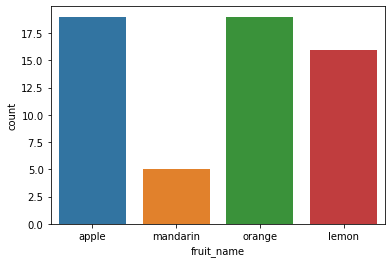

In [4]:
# plot the distribution
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

In [5]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

In [6]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

clftree = DecisionTreeClassifier(max_depth=3, random_state=24)
clftree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=24, splitter='best')

### Print decision rules

In [7]:
from sklearn.tree.export import export_text

r = export_text(clftree, feature_names=feature_names)
print(r)

|--- height <= 7.95
|   |--- mass <= 128.00
|   |   |--- height <= 6.10
|   |   |   |--- class: 2
|   |   |--- height >  6.10
|   |   |   |--- class: 4
|   |--- mass >  128.00
|   |   |--- width <= 7.25
|   |   |   |--- class: 3
|   |   |--- width >  7.25
|   |   |   |--- class: 1
|--- height >  7.95
|   |--- width <= 7.40
|   |   |--- class: 4
|   |--- width >  7.40
|   |   |--- class: 3



### Print tree image

##### Approach 1

In [4]:
# pip install pydotplus

# pip install graphviz
# conda install graphviz
# add the location of 'gvedit.exe' file to the user's environment variable

import pydotplus as pdp
from IPython.display import Image
from io import StringIO


# This function creates images of tree models using pydotplus
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pdp.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [5]:
graph3 = print_tree(clftree, features=X.columns, class_names=['apple', 'mandarin','orange','lemon'])
Image(graph3.create_png())

NameError: name 'clftree' is not defined

##### Approach 2
If you cannot print using the first approach, as a workaround, you can print the image from a web link

In [10]:
with open("fruit_classifier.txt", "w") as f:
    f = tree.export_graphviz(clftree, out_file=f, feature_names=feature_names, class_names=['apple', 'mandarin','orange','lemon'], filled=True)

# copy the content in "fruit_classifier.txt" to http://webgraphviz.com/, to display the tree image

### Variable Importance

[('mass', 0.19478841180144613), ('width', 0.45180048218827407), ('height', 0.3534111060102798), ('color_score', 0.0)]


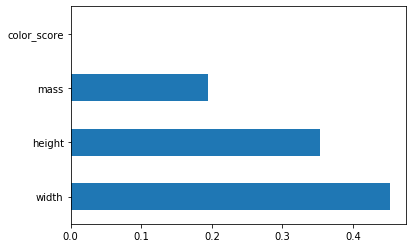

In [11]:
# View a list of the features and their importance scores
print(list(zip(X, clftree.feature_importances_)))

# plot the important features
feat_importances = pd.Series(clftree.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')